<a href="https://colab.research.google.com/github/faizaunullah87/Tugas-Akhir/blob/main/Support_Vector_Mechine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def load_data():
  data = pd.read_excel('dataclean.xlsx')
  return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,Unnamed: 0,label,description,lower,h_angka,token,tweet_clean
0,2447,Netral,🙂🙂🙂🙂🙂😍😍😍😍😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,🙂🙂🙂🙂🙂😍😍😍😍😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,🙂🙂🙂🙂🙂😍😍😍😍😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,[],NaN
1,2235,Netral,Yang benar,yang benar,yang benar,[],NaN
2,2445,Netral,😭😭,😭😭,😭😭,[],NaN
3,3857,Netral,https://t.co/xh5ItaGHuT,https://t.co/xh5itaghut,https://t.co/xhitaghut,[],NaN
4,3222,Netral,🤦🏼‍♂️,🤦🏼‍♂️,🤦🏼‍♂️,"['', '']",NaN


In [ ]:
df = pd.DataFrame(tweet_df[['label','tweet_clean']])

In [ ]:
df['label'].value_counts()

Positif    2741
Negatif    1752
Netral     1009
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset Asli dan Labeling')

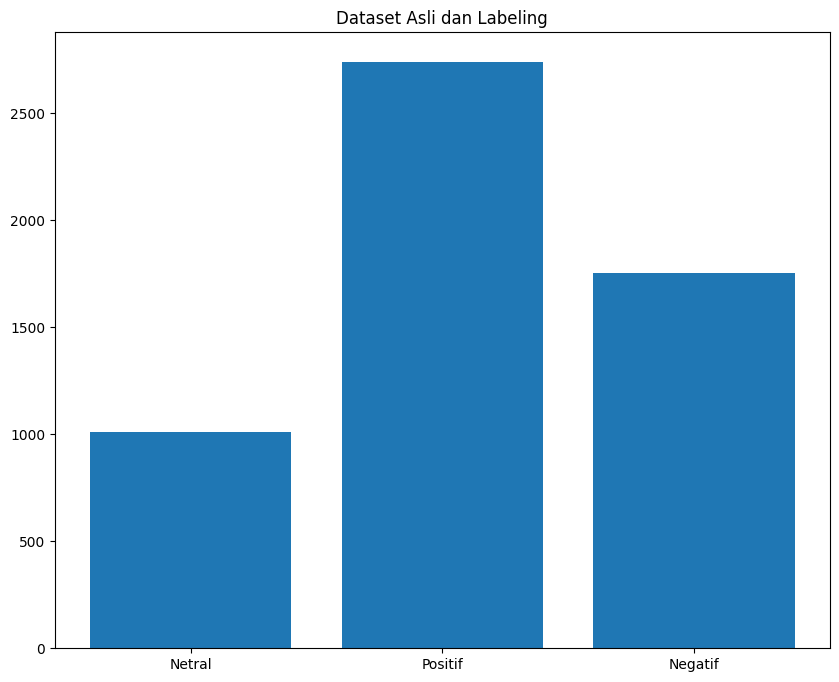

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
label_cnt = Counter(df['label'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset Asli dan Labeling")

In [ ]:
X = df.drop(['label'], axis=1)
y = df['label']

In [ ]:
X=df
Y=df['label']

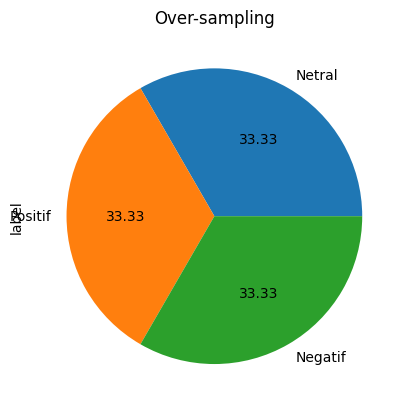

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")


In [ ]:
# Class distribution
y_res.value_counts()

Netral     2741
Positif    2741
Negatif    2741
Name: label, dtype: int64

In [ ]:
df = X_res

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['tweet_clean'].values.astype('U'))
bow_transformer.vocabulary_

{'nan': 5966,
 'batas': 820,
 'ilmu': 3386,
 'ekonomi': 2337,
 'gw': 3003,
 'yah': 9875,
 'simak': 8341,
 'kl': 4392,
 'bang': 735,
 'chatib': 1586,
 'basri': 813,
 'lambat': 4789,
 'resesi': 7623,
 'end': 2415,
 'tumbuh': 9400,
 'negara': 6050,
 'minus': 5623,
 'quarter': 7398,
 'sebab': 8019,
 'rumus': 7800,
 'gdp': 2755,
 'growth': 2950,
 'indonesia': 3458,
 'konsumsi': 4526,
 'warga': 9704,
 'putar': 7374,
 'kasih': 4084,
 'makan': 5153,
 'cepat': 1553,
 'pulih': 7344,
 'aaammmiiinn': 3,
 'aah': 5,
 'aja': 136,
 'aamiin': 9,
 'doakain': 2135,
 'anti': 436,
 'portofolio': 7178,
 'bangkrut': 750,
 'bar': 786,
 'moga': 5752,
 'benarlebih': 915,
 'seru': 8228,
 'meteor': 5542,
 'tabrak': 8824,
 'bumi': 1409,
 'ta': 8819,
 'tunggu': 9411,
 'tsunami': 9363,
 'meter': 5543,
 'tdk': 8972,
 'aauu': 15,
 'aj': 135,
 'gelap': 2775,
 'percaya': 6922,
 'ama': 294,
 'omong': 6520,
 'orang': 6577,
 'klo': 4405,
 'aq': 490,
 'tuhan': 9384,
 'allah': 253,
 'swt': 8797,
 'sang': 7909,
 'kuasa': 4657

In [ ]:
text_bow = bow_transformer.transform(df['tweet_clean'].values.astype('U'))
print(text_bow)

  (0, 5966)	1
  (1, 5966)	1
  (2, 5966)	1
  (3, 5966)	1
  (4, 5966)	1
  (5, 5966)	1
  (6, 5966)	1
  (7, 5966)	1
  (8, 5966)	1
  (9, 5966)	1
  (10, 5966)	1
  (11, 5966)	1
  (12, 5966)	1
  (13, 5966)	1
  (14, 5966)	1
  (15, 5966)	1
  (16, 5966)	1
  (17, 5966)	1
  (18, 5966)	1
  (19, 5966)	1
  (20, 5966)	1
  (21, 5966)	1
  (22, 5966)	1
  (23, 5966)	1
  (24, 5966)	1
  :	:
  (8217, 2871)	1
  (8217, 2976)	1
  (8217, 3234)	1
  (8217, 3458)	1
  (8217, 3866)	1
  (8217, 5713)	1
  (8217, 6394)	1
  (8217, 7073)	1
  (8217, 8004)	1
  (8217, 8941)	1
  (8217, 8972)	1
  (8218, 1553)	1
  (8218, 2857)	1
  (8218, 3365)	1
  (8218, 3933)	1
  (8218, 5995)	1
  (8219, 5255)	1
  (8220, 3704)	1
  (8220, 7623)	1
  (8220, 7649)	1
  (8221, 1364)	1
  (8221, 1710)	1
  (8221, 2337)	1
  (8221, 5140)	1
  (8222, 5966)	1


In [ ]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(8223, 9985)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)
tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 5966)	1.0
  (1, 5966)	1.0
  (2, 5966)	1.0
  (3, 5966)	1.0
  (4, 5966)	1.0
  (5, 5966)	1.0
  (6, 5966)	1.0
  (7, 5966)	1.0
  (8, 5966)	1.0
  (9, 5966)	1.0
  (10, 5966)	1.0
  (11, 5966)	1.0
  (12, 5966)	1.0
  (13, 5966)	1.0
  (14, 5966)	1.0
  (15, 5966)	1.0
  (16, 5966)	1.0
  (17, 5966)	1.0
  (18, 5966)	1.0
  (19, 5966)	1.0
  (20, 5966)	1.0
  (21, 5966)	1.0
  (22, 5966)	1.0
  (23, 5966)	1.0
  (24, 5966)	1.0
  :	:
  (8217, 8004)	0.3701990985871679
  (8217, 7073)	0.32679723492521934
  (8217, 6394)	0.16625041586321637
  (8217, 5713)	0.3701990985871679
  (8217, 3866)	0.20214314316242385
  (8217, 3458)	0.1281759995914363
  (8217, 3234)	0.31645038510572415
  (8217, 2976)	0.2280068096473843
  (8217, 2871)	0.21735459101875068
  (8217, 2775)	0.3232199528671855
  (8217, 159)	0.3701990985871679
  (8218, 5995)	0.44912094200037667
  (8218, 3933)	0.527625501000995
  (8218, 3365)	0.43506712320009877
  (8218, 2857)	0.3802269969025782
  (8218, 1553)	0.4313301975134365
  (8219, 52

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, df.label, test_size=0.2,
random_state=35)

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=10000).fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0       Positif
1       Positif
2       Negatif
3        Netral
4       Negatif
5        Netral
6        Netral
7       Negatif
8       Positif
9       Negatif
10       Netral
11       Netral
12       Netral
13      Positif
14      Negatif
15       Netral
16      Positif
17       Netral
18      Negatif
19      Positif
20       Netral
21       Netral
22       Netral
23       Netral
24      Positif
25       Netral
26      Negatif
27       Netral
28       Netral
29      Negatif
30       Netral
31      Positif
32      Negatif
33      Negatif
34      Positif
35       Netral
36      Positif
37      Negatif
38      Negatif
39      Negatif
40       Netral
41       Netral
42       Netral
43      Positif
44       Netral
45      Negatif
46       Netral
47       Netral
48       Netral
49      Negatif
50       Netral
51      Positif
52      Negatif
53       Netral
54      Positif
55      Negatif
56       Netral
57      Negatif
58      Positif
59       Netral
60      Negatif
61      Negatif
62      

In [ ]:
true_label= pd.Series(y_test)
print(true_label.to_string())

2709    Positif
3764    Positif
6341    Negatif
3870     Netral
6042    Negatif
2192    Negatif
6679     Netral
4057    Negatif
1419    Positif
2420    Positif
835     Negatif
6972     Netral
4571    Negatif
4404    Positif
2596    Negatif
3943    Positif
2135    Positif
5368    Negatif
3590    Negatif
1227    Negatif
7579     Netral
770      Netral
8179     Netral
2        Netral
2249    Positif
3677     Netral
3718    Negatif
4373    Negatif
7230     Netral
1271    Positif
8190     Netral
1256    Positif
6333    Negatif
5756    Negatif
1809    Positif
7690     Netral
2485    Positif
1952    Negatif
784     Negatif
6054    Negatif
7743     Netral
4523    Positif
8205     Netral
3476    Positif
7201     Netral
805     Negatif
861     Positif
6730     Netral
7751     Netral
6168    Negatif
4447     Netral
5325    Positif
5623    Negatif
1194    Negatif
78      Positif
790     Negatif
4080     Netral
3256    Positif
4636     Netral
1282    Negatif
2279    Negatif
5738    Negatif
7727    

In [ ]:
#Confussion Matrix
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

test time:  0.117s
accuracy:   0.800
              precision    recall  f1-score   support

     Negatif       0.81      0.77      0.79       546
      Netral       0.76      0.95      0.85       544
     Positif       0.85      0.68      0.75       555

    accuracy                           0.80      1645
   macro avg       0.81      0.80      0.80      1645
weighted avg       0.81      0.80      0.80      1645



Text(0.5, 23.52222222222222, 'Label prediksi')

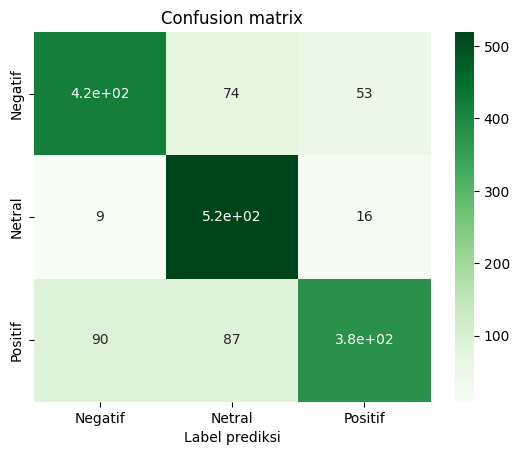

In [ ]:
t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))

columns = ['Negatif','Netral','Positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train,y_train, cv=10)
# Print the accuracy of each fold:
print(scores)
# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.75835866 0.79787234 0.7781155  0.78571429 0.78723404 0.79635258
 0.7887538  0.80699088 0.78234399 0.77321157]
0.7854947652819992
